## Exercise 2.6 - Building dashboards with streamlit

In [1]:
# Import Libraries
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

### Wrangle Data

In [3]:
# Load the dataset
file_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\Prepared Data\merged_citibike_weather.csv"
df = pd.read_csv(file_path, low_memory=False)


In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_date             object
start_time             object
end_date               object
end_time               object
date                   object
avg_temp              float64
_merge                 object
dtype: object

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,date,avg_temp,_merge
0,70F3BA79664016C1,classic_bike,2022-02-28 09:22:49.821,2022-02-28 09:28:55.174,9 Ave & W 18 St,6190.08,Greenwich Ave & Charles St,5914.08,40.743174,-74.003664,40.735238,-74.000271,member,2022-02-28,09:22:49.821000,2022-02-28,09:28:55.174000,2022-02-28,0.8,both
1,8FA3412A958122D0,electric_bike,2022-02-14 10:47:30.462,2022-02-14 10:56:04.433,W 120 St & Claremont Ave,7745.07,Frederick Douglass Blvd & W 117 St,7688.12,40.810949,-73.963400,40.805159,-73.954692,member,2022-02-14,10:47:30.462000,2022-02-14,10:56:04.433000,2022-02-14,-4.3,both
2,0E2BA02AEAD03EB8,electric_bike,2022-02-18 22:26:55.796,2022-02-18 22:44:31.472,E 4 St & 2 Ave,5593.04,Greenwich Ave & Charles St,5914.08,40.726281,-73.989780,40.735238,-74.000271,member,2022-02-18,22:26:55.796000,2022-02-18,22:44:31.472000,2022-02-18,9.9,both
3,B626F8E1D7ABABBA,classic_bike,2022-02-09 18:38:18.621,2022-02-09 18:47:11.274,White St & Johnson Ave,5099.03,Irving Ave & Harman St,4856.05,40.707174,-73.935810,40.701080,-73.917900,member,2022-02-09,18:38:18.621000,2022-02-09,18:47:11.274000,2022-02-09,2.8,both
4,605E7CC493D08F3B,electric_bike,2022-02-06 14:52:48.564,2022-02-06 14:55:56.218,S Portland Ave & Hanson Pl,4354.05,Nevins St & Schermerhorn St,4437.09,40.685396,-73.974315,40.687372,-73.981761,member,2022-02-06,14:52:48.564000,2022-02-06,14:55:56.218000,2022-02-06,-4.8,both


In [6]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['date'] = pd.to_datetime(df['date'])

df['start_time'] = pd.to_datetime(df['start_time']).dt.time
df['end_time'] = pd.to_datetime(df['end_time']).dt.time


In [7]:
df['ride_id'] = df['ride_id'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')

df['_merge'] = df['_merge'].astype('category')

In [8]:
# Save a backup of the original file
backup_file_path = file_path.replace('.csv', '_backup.csv')
df.to_csv(backup_file_path, index=False)

# Save the updated file
df.to_csv(file_path, index=False)

### Create the plotly charts

In [9]:
# Add a column to count trips
df['value'] = 1

# Group data by start station name and calculate the number of trips
df_groupby = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})

# Get the top 20 stations with the highest trip counts
top20 = df_groupby.nlargest(20, 'value')


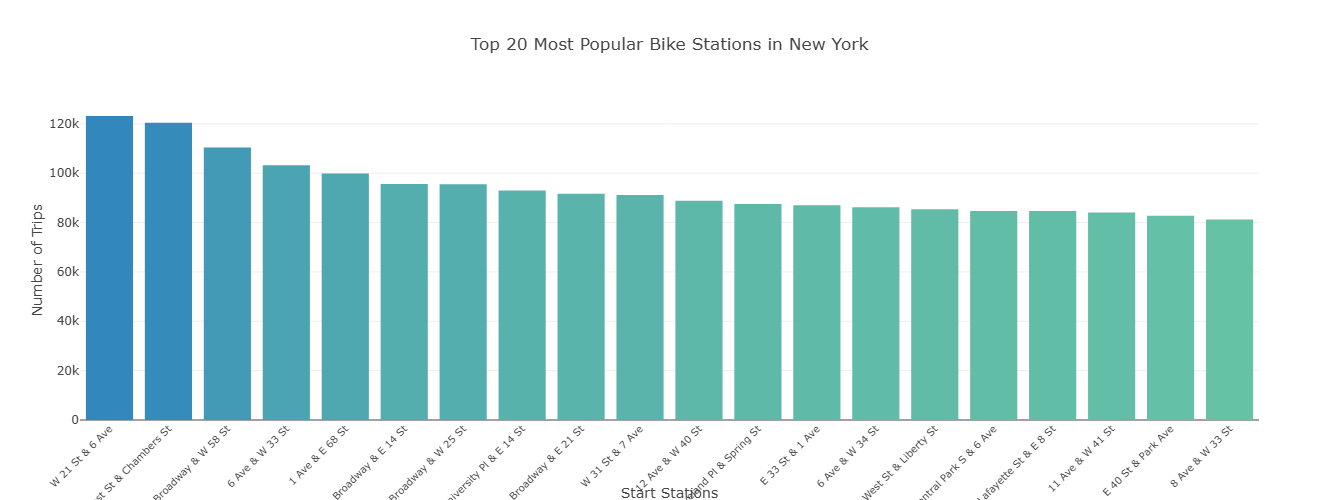

In [12]:
# Create the Bar Chart with Plotly
fig = go.Figure(
    go.Bar(
        x=top20['start_station_name'],  # Station names on x-axis
        y=top20['value'],              # Trip counts on y-axis
        marker={
            'color': top20['value'],    # Color bars based on trip counts
            'colorscale': [[0, '#66c2a5'], [1, '#3288bd']]  # Custom colorscale
        }
    )
)

# Customize the Chart Layout
fig.update_layout(
    title='Top 20 Most Popular Bike Stations in New York',
    xaxis_title='Start Stations',
    yaxis_title='Number of Trips',
    width=900,  # Adjust width for a smaller chart
    height=500,  # Adjust height for a smaller chart
    xaxis_tickangle=-45,  # Rotate x-axis labels to prevent overlap
    xaxis=dict(
        tickfont=dict(size=10)  # Slightly smaller font for x-axis labels
    )
)

#  Display the Chart
fig.show()

# Save the Chart to a File
save_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Visualizations\top20_stations.html"
fig.write_html(save_path)


In [13]:
# Save the top 20 stations to a CSV file
save_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\Prepared Data\top20_stations.csv"
top20.to_csv(save_path, index=False)

#### Create a dual-axis line chart for the aggregated bike trips and temperatures in plotly

In [14]:
# Load the dataset
file_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\Prepared Data\merged_weather_trips.csv"
df_trips = pd.read_csv(file_path, low_memory=False)

In [15]:
df_trips.head()

,date,avg_temp,trip_count
0,2022-01-01,11.6,20428
1,2022-01-02,11.4,43009
2,2022-01-03,1.4,33189
3,2022-01-04,-2.7,36842
4,2022-01-05,3.2,34230


In [18]:
df_trips.dtypes

date           object
avg_temp      float64
trip_count      int64
dtype: object

#### _The next chart's output has been deleted because it inflates the notebook's size a lot_ 

In [ ]:
# Ensure Date Column is in Correct Format
df_trips['date'] = pd.to_datetime(df['date'])

# Create Dual-Axis Line Chart
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add line for daily bike rides (trip_count)
fig.add_trace(
    go.Scatter(
        x=df_trips['date'], 
        y=df_trips['trip_count'], 
        name='Daily Bike Rides',
        line=dict(color='blue')
    ),
    secondary_y=False  # Assign to the primary y-axis
)

# Add line for average daily temperature (avg_temp)
fig.add_trace(
    go.Scatter(
        x=df_trips['date'], 
        y=df_trips['avg_temp'], 
        name='Daily Temperature',
        line=dict(color='red')
    ),
    secondary_y=True  # Assign to the secondary y-axis
)

# Customize Layout
fig.update_layout(
    title='Daily Bike Rides and Temperatures in New York',
    xaxis_title='Date',
    yaxis_title='Bike Rides (Primary Y-Axis)',
    yaxis2_title='Temperature (°C) (Secondary Y-Axis)',
    width=900,
    height=600,
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Step 5: Show the Chart
fig.show()

In [21]:
# Save the Chart
save_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Visualizations\bike_trips_temp_dual_axis.html"
fig.write_html(save_path)

In [22]:
# Define the save path
save_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\Prepared Data\updated_df_trips.csv"
# Save the updated DataFrame to a CSV file
df_trips.to_csv(save_path, index=False)


In [26]:
import gc # this is a garbage collector
gc.collect()

1780

In [28]:
 df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_date', 'start_time', 'end_date', 'end_time',
       'date', 'avg_temp', '_merge', 'value'],
      dtype='object')

### Reduce the row and column count

In [30]:
# Reduce Columns
columns_to_drop = [
    'started_at', 'ended_at', 'start_station_id', 'end_station_id', 'date', '_merge'
]
df_reduced = df.drop(columns=columns_to_drop)

In [33]:
# Randomly sample 10-20% of rows
sample_fraction = 0.15  # Adjust fraction between 0.10 (10%) and 0.20 (20%)
np.random.seed(42)  # Ensure reproducibility
mask = np.random.rand(len(df_reduced)) <= sample_fraction
df_sampled = df_reduced[mask]

In [ ]:
# Print the shapes
print("Original dataset shape:", df_reduced.shape)
print(f"Reduced dataset shape ({int(sample_fraction * 100)}% rows):", df_sampled.shape)

# Save the reduced dataset
output_path = "reduced_citibike_data.csv"
df_sampled.to_csv(output_path, index=False)

Original dataset shape: (28814251, 15)
Reduced dataset shape (15% rows): (4319745, 15)
